# HDB Resale Price at Singapore 2016-2020

Nama Kelompok
1. Bisma Adhira
2. Azri Ansori Rahman

1. Data : HDB Resale Price 2016-2020
2. Regression

Insights yang dapat diambil meliputi properti di daerah mana saja yang paling worth it, faktor apa saja yang paling memengaruhi tinggi rendahnya harga properti, dan pergolakan trend serta volume transaksi properti dari tahun 2016 sampai tahun 2020. 

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from sklearn import datasets, linear_model, metrics
from matplotlib import rcParams

# Data Collecting

In [258]:
df = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv') #df adalah data dari tahun 2017-2020

In [259]:
df2 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')#df2 adalah data dari jan 2015 - dec 2016


In [260]:
# mengganti tipe data pada pada kolom 'month'
df['month'] = pd.to_datetime(df['month'],format='%Y-%m')
df2['month'] = pd.to_datetime(df2['month'],format='%Y-%m')

In [261]:
df2 = df2[df2['month'] >= '2016-01-01'] #kolom month yang diambil hanya yang lebih besar dari Januari 2016

In [262]:
df2_update = df2.copy() #df2_update adalah dataframe pada tahun 2016

In [263]:
data = pd.concat([df,df2_update])
#gabung data dan menamai nama dataframe yaitu data

In [264]:
data = data.sort_values(by = 'month', ascending = True)

In [265]:
data['month'] = pd.to_datetime(data['month'])

In [266]:
data.reset_index(inplace = True)

In [267]:
data = data.loc[:,data.columns != 'index']

In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99747 entries, 0 to 99746
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                99747 non-null  datetime64[ns]
 1   town                 99747 non-null  object        
 2   flat_type            99747 non-null  object        
 3   block                99747 non-null  object        
 4   street_name          99747 non-null  object        
 5   storey_range         99747 non-null  object        
 6   floor_area_sqm       99747 non-null  float64       
 7   flat_model           99747 non-null  object        
 8   lease_commence_date  99747 non-null  int64         
 9   remaining_lease      99747 non-null  object        
 10  resale_price         99747 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 8.4+ MB


In [269]:
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2016-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,62,230000.0
1,2016-01-01,SENGKANG,4 ROOM,308C,ANCHORVALE RD,04 TO 06,90.0,Model A,2002,85,355000.0
2,2016-01-01,SENGKANG,4 ROOM,185D,RIVERVALE CRES,16 TO 18,91.0,Model A2,2000,83,350000.0
3,2016-01-01,SENGKANG,4 ROOM,303B,ANCHORVALE LINK,07 TO 09,85.0,Model A2,2001,84,350000.0
4,2016-01-01,SENGKANG,4 ROOM,303B,ANCHORVALE LINK,04 TO 06,85.0,Model A2,2001,84,330000.0
...,...,...,...,...,...,...,...,...,...,...,...
99742,2020-09-01,HOUGANG,4 ROOM,475A,UPP SERANGOON CRES,13 TO 15,92.0,DBSS,2014,93 years 02 months,620000.0
99743,2020-09-01,HOUGANG,4 ROOM,477C,UPP SERANGOON VIEW,01 TO 03,92.0,Premium Apartment,2016,94 years 07 months,452000.0
99744,2020-09-01,HOUGANG,4 ROOM,477A,UPP SERANGOON VIEW,04 TO 06,95.0,Premium Apartment,2016,94 years 06 months,578888.0
99745,2020-09-01,HOUGANG,4 ROOM,142,LOR AH SOO,10 TO 12,108.0,Model A,1984,63 years 02 months,450888.0


Sekarang tahun dari data mulai dari 2016 hingga 2020

dapat terlihat bahwa data tidak memiliki missing values, sehingga langkah selanjutnya bisa dilakukan 

# Exploratory Data Analysis

## Month

In [270]:
data['year'] = pd.DatetimeIndex(data['month']).year #kolom year berasal dari tahun pada kolom month

<AxesSubplot:xlabel='year', ylabel='count'>

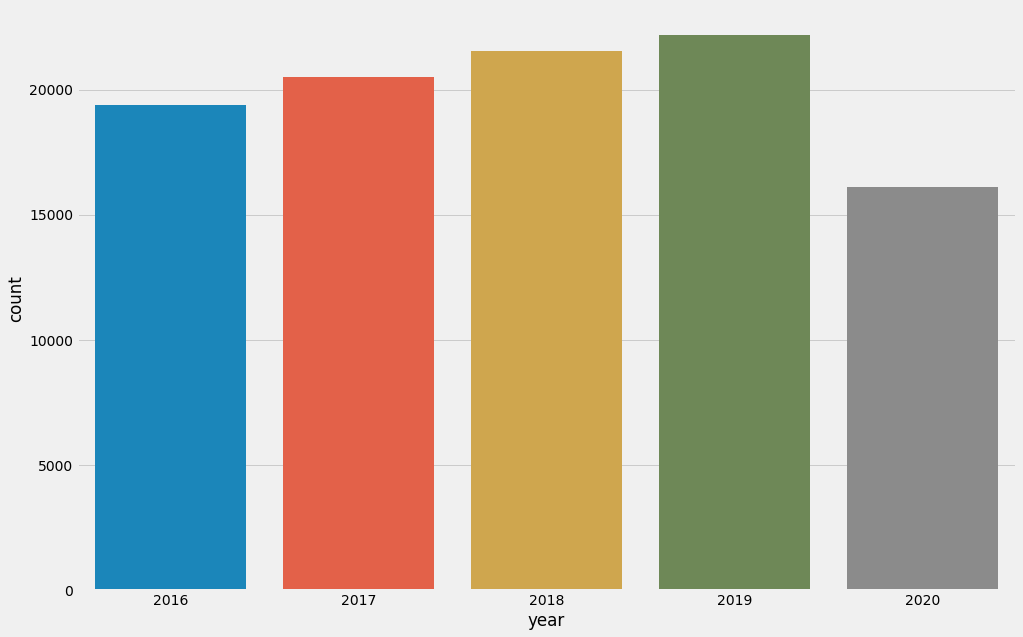

In [271]:
plt.figure(figsize=(15,10))
sns.countplot(data=data,x='year')

Dapat terlihat pada tahun 2020 jumlah resale price paling rendah dibanding dengan tahun-tahun sebelumnya, karena mungkin data 2020 tidak sepenuhnya hingga bulan Desember

Text(0, 0.5, 'Jumlah Flat')

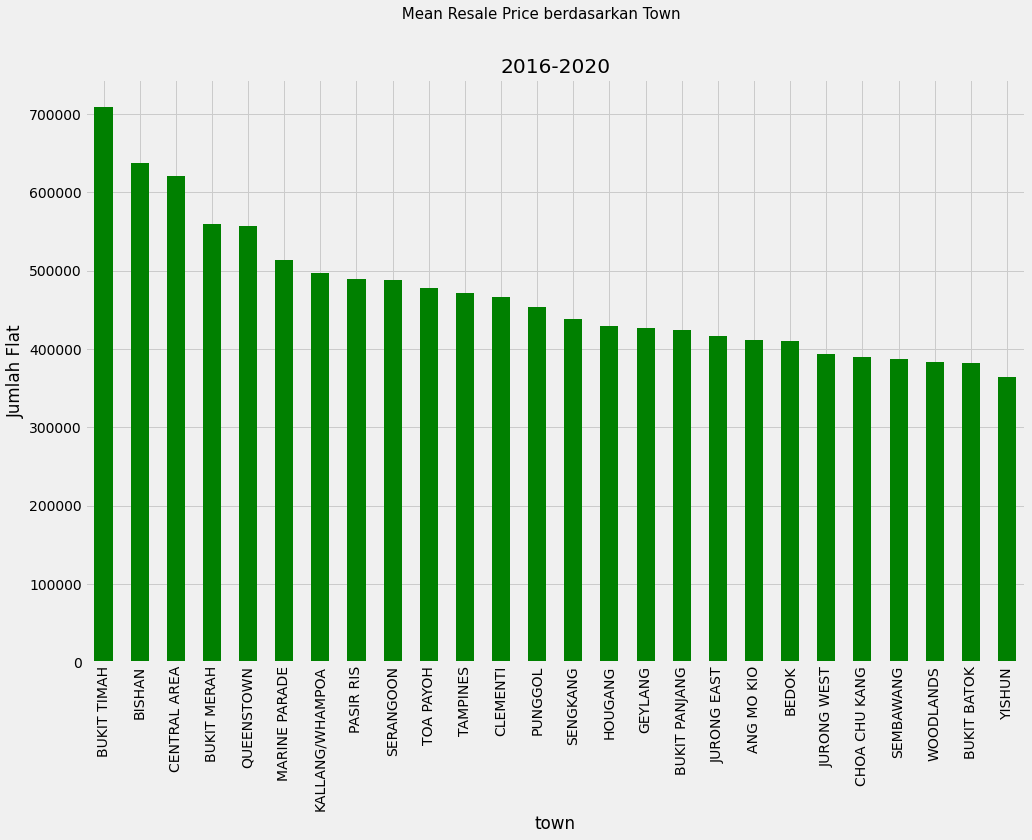

In [272]:
data.groupby('town')['resale_price'].mean().sort_values(ascending=False).plot(kind='bar',color='green')
plt.suptitle(' Mean Resale Price berdasarkan Town',size=15)
plt.title('2016-2020')
plt.ylabel('Jumlah Flat')

Text(0, 0.5, 'Jumlah')

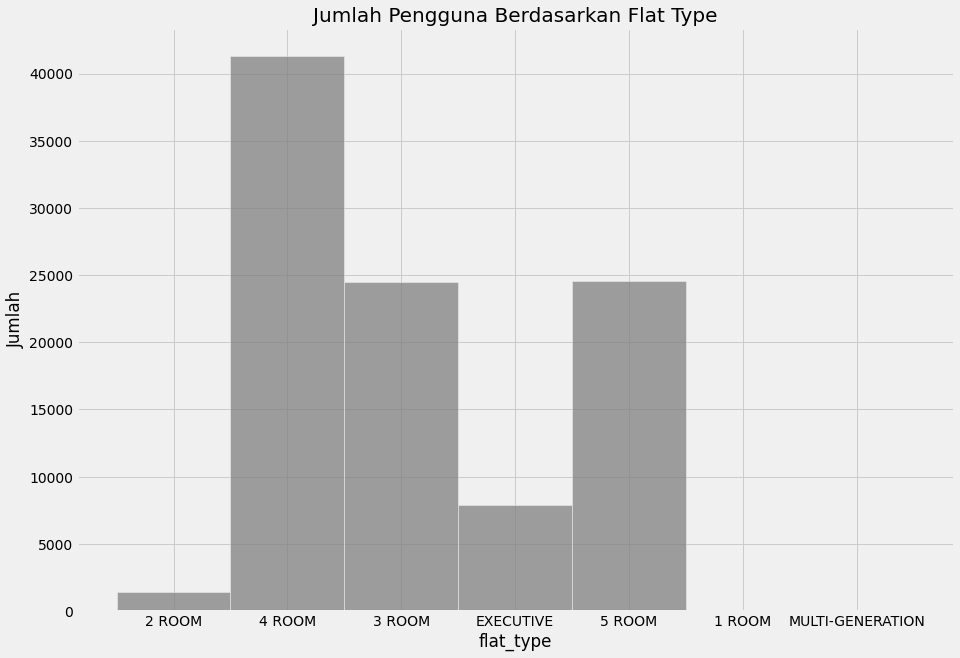

In [273]:
plt.figure(figsize=(14,10))
sns.histplot(data=data,x='flat_type', color='grey')
plt.title('Jumlah Pengguna Berdasarkan Flat Type',size=20)
plt.ylabel('Jumlah')

Sepertinya penduduk Singapura tidak begitu memiliki minat terhadap rumah dengan type 1 room, 2 room, dan Multi Generation

## Block

In [274]:
data_copy = data.copy()
import re #import re sebagai packages yang hanya akan menampilkan angka saja
get_num = lambda x: int(re.findall("\d+", x)[0])
data_copy['blocknum'] = data_copy['block'].apply(get_num)\

SyntaxError: unexpected EOF while parsing (465082896.py, line 4)

<AxesSubplot:xlabel='blocknum', ylabel='resale_price'>

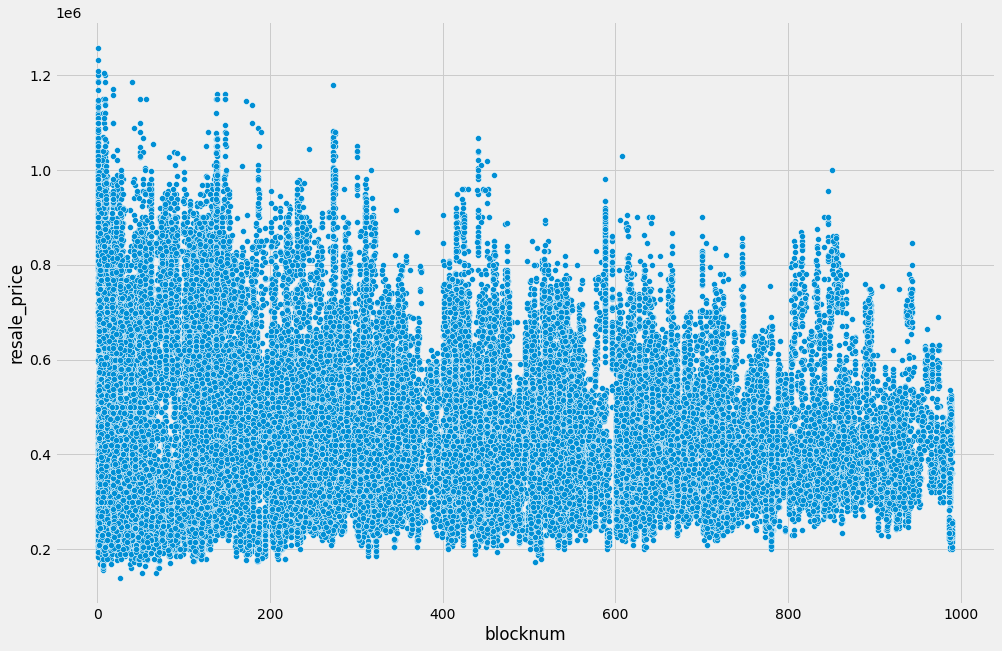

In [275]:
sns.scatterplot(data=data_copy,x='blocknum',y='resale_price')

## Storey Range

Text(0, 0.5, 'Resale_Price')

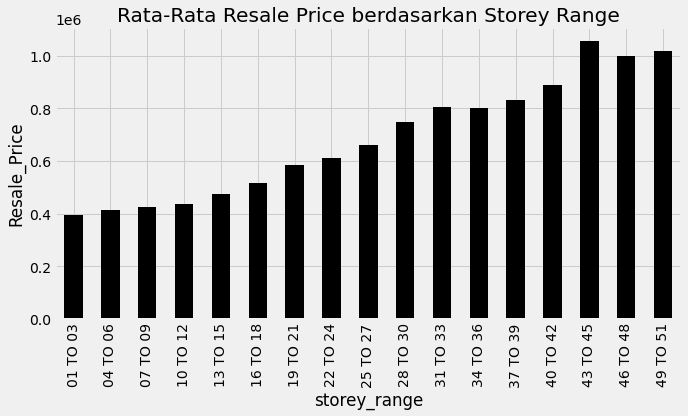

In [276]:
plt.figure(figsize=(10,5))
data.groupby('storey_range')['resale_price'].mean().plot(kind='bar',color='black')
plt.title('Rata-Rata Resale Price berdasarkan Storey Range')
plt.ylabel('Resale_Price')
#lokasi lantai pada apartment mempengaruhi harga 

Ternyata, semakin tinggi dari tingkat flat, maka harga semakin mahal, yang dapat terlihat pada rata-rata resale price diatas. Namun, pada lantai 43 to 45 lah rata-rata harga flat paling mahal

## Flat_Type

Text(0, 0.5, 'resale_price')

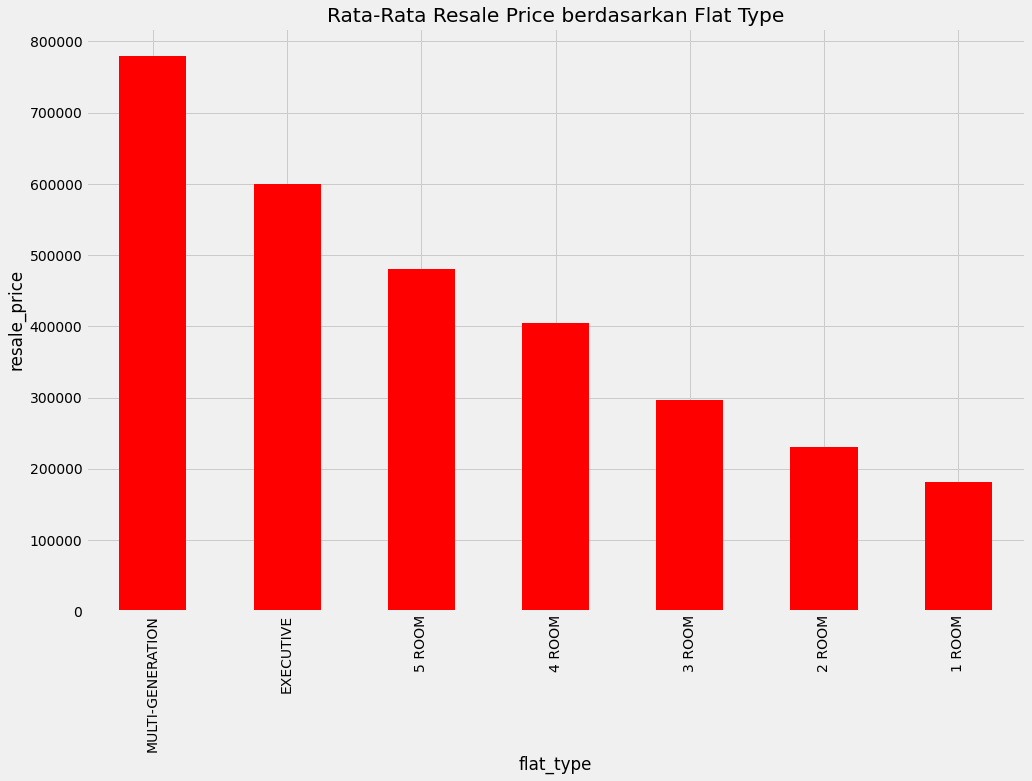

In [277]:
data.groupby('flat_type')['resale_price'].median().sort_values(ascending=False).plot(kind='bar',color='red')
plt.title('Rata-Rata Resale Price berdasarkan Flat Type')
plt.ylabel('resale_price')

In [278]:
data[data['flat_type'] == 'MULTI-GENERATION'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 3023 to 98499
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                41 non-null     datetime64[ns]
 1   town                 41 non-null     object        
 2   flat_type            41 non-null     object        
 3   block                41 non-null     object        
 4   street_name          41 non-null     object        
 5   storey_range         41 non-null     object        
 6   floor_area_sqm       41 non-null     float64       
 7   flat_model           41 non-null     object        
 8   lease_commence_date  41 non-null     int64         
 9   remaining_lease      41 non-null     object        
 10  resale_price         41 non-null     float64       
 11  year                 41 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 4.2+ KB


## Flat Model

Text(0, 0.5, 'Rata-Rata(Million SGD)')

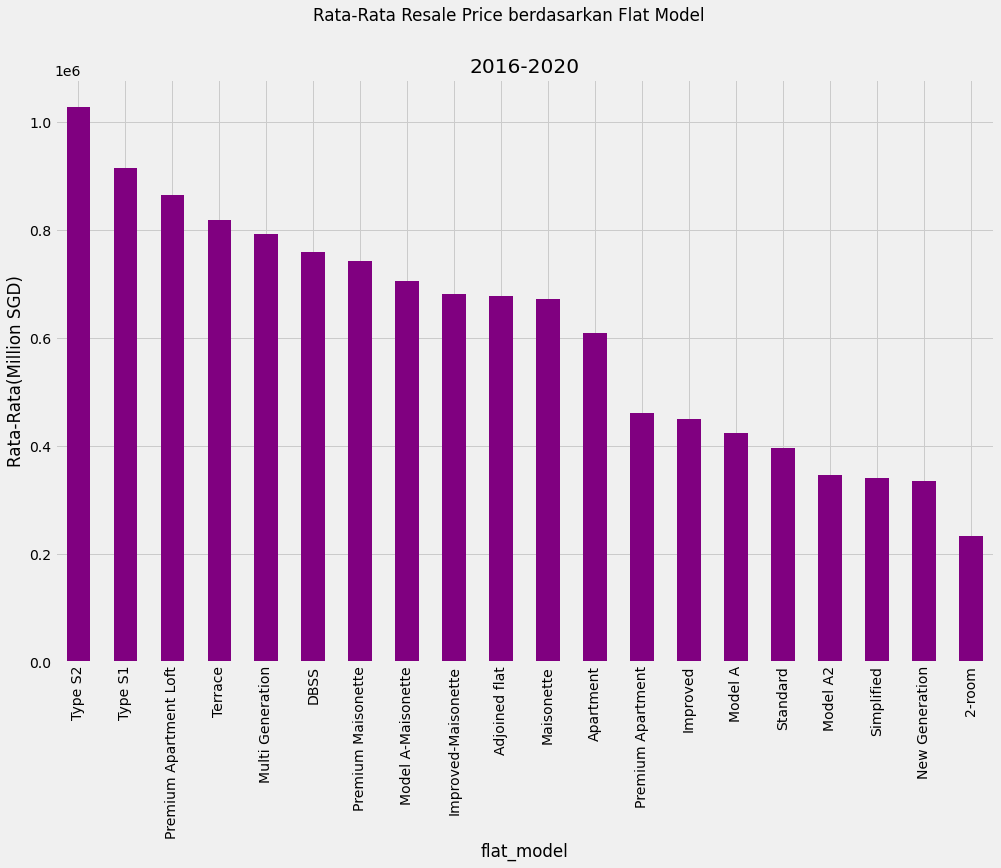

In [279]:
data.groupby('flat_model')['resale_price'].mean().sort_values(ascending=False).plot(kind='bar',color='purple')
plt.suptitle('Rata-Rata Resale Price berdasarkan Flat Model')
plt.title('2016-2020')
plt.ylabel('Rata-Rata(Million SGD)')

## Town

Text(0, 0.5, 'Resale_Flat')

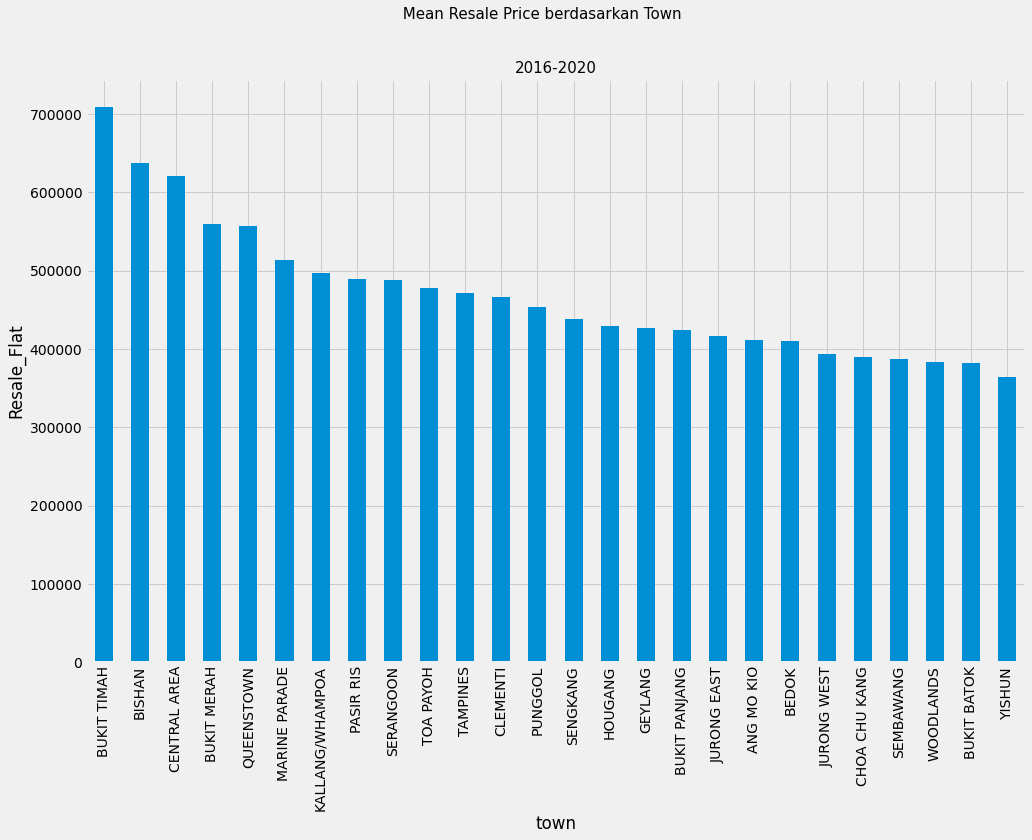

In [280]:
plt.figure(figsize=(15,10))
data.groupby('town')['resale_price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.suptitle(' Mean Resale Price berdasarkan Town',size=15)
plt.title('2016-2020',size=15)
plt.ylabel('Resale_Flat')

Sebagian besar flat pada Bukit Timah, Bishan, dan Bukit Merah memiliki harga atau resale flat yang sangat tinggi diatas 500000 SGD 

<AxesSubplot:title={'center':'Jumlah Penjualan Flat 2016-2020'}>

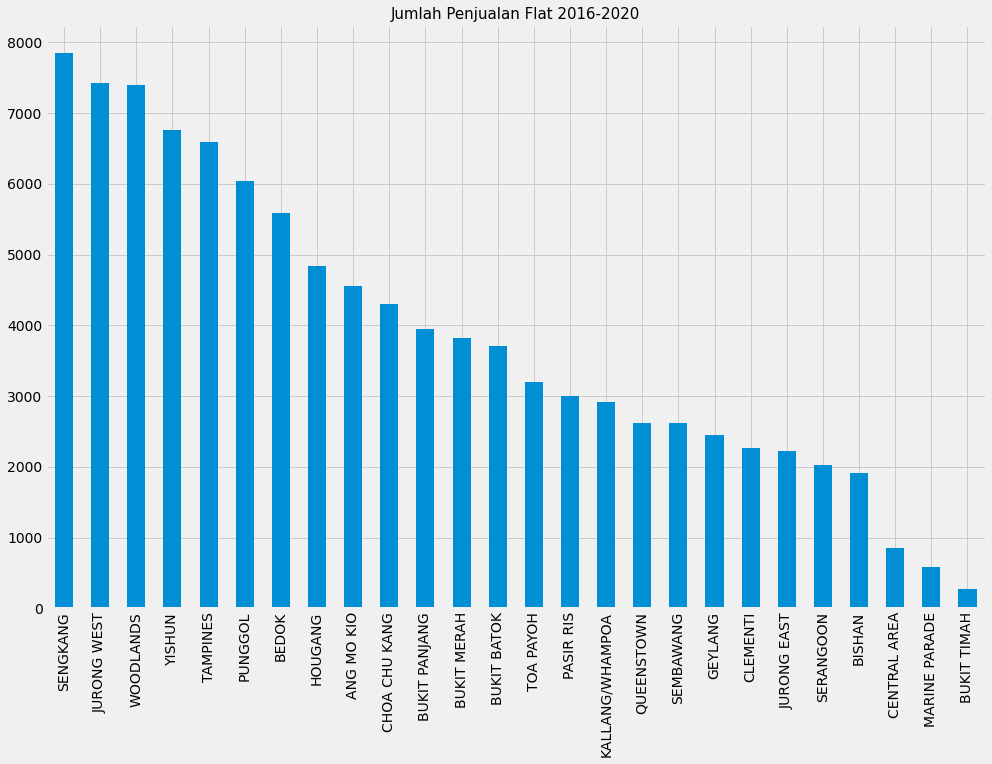

In [281]:
plt.figure(figsize=(15,10))
plt.title('Jumlah Penjualan Flat 2016-2020',size=15)
data['town'].value_counts().sort_values(ascending=False).plot(kind='bar')

Namun, itu tidak sebanding dengan penjualan yang mereka alami dari tahun 2016 hingga 2020 yaitu pada daerah Bishan dan Bukit Timah

Text(0, 0.5, 'Tahun')

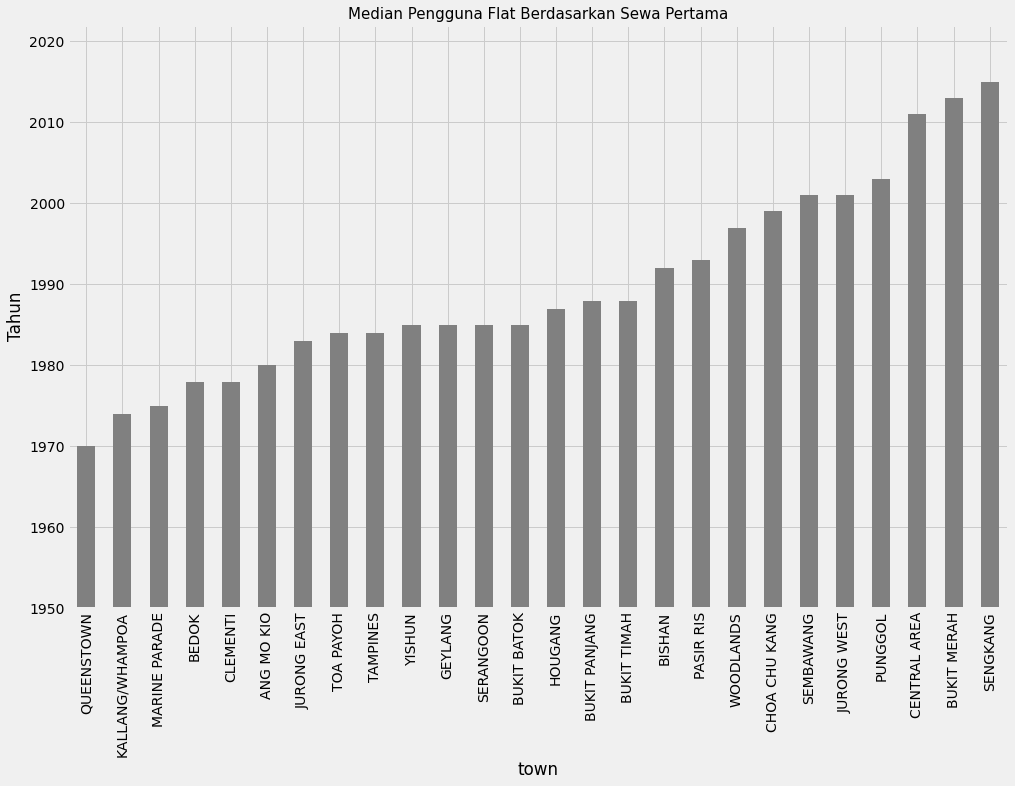

In [282]:
plt.figure(figsize = (15,10))
plt.title('Median Pengguna Flat Berdasarkan Sewa Pertama',size=15)
data.groupby('town')['lease_commence_date'].agg(pd.Series.mode).sort_values().plot(kind='bar',color='grey')
plt.ylim(1950,2022)
plt.ylabel('Tahun')

Sebagian besar flat di Sengkang, Bukit Merah, Central Area, dan Punggol memiliki umur yang 'muda' dan bisa ditempati pada jangka waktu yang lama, karena batasan dari Pemerintah Singapura untuk menempati flat yaitu 99 tahun lamanya setelah tahun pertama sewa.

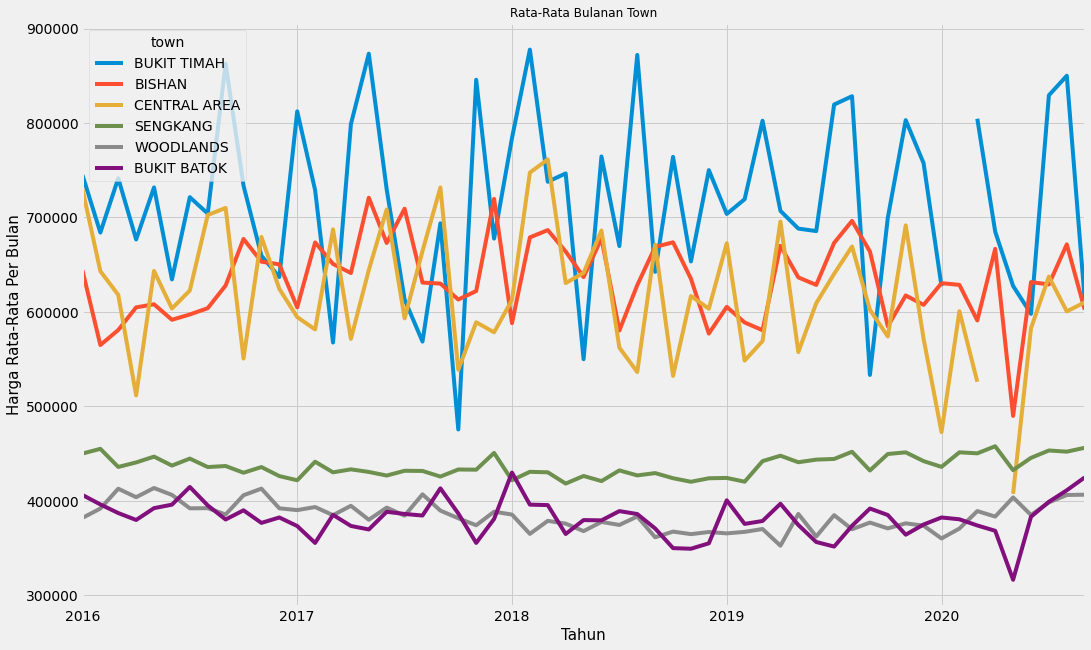

In [283]:
harga_town = data.pivot_table(values='resale_price', index='town', columns='month')
harga_town.transpose()[['BUKIT TIMAH','BISHAN','CENTRAL AREA','SENGKANG','WOODLANDS','BUKIT BATOK']].plot(figsize=(16,10))
plt.title('Rata-Rata Bulanan Town', size=12)
plt.xlabel('Tahun', size=15)
plt.ylabel('Harga Rata-Rata Per Bulan', size=15)
print()

Terlihat pada grafik diatas, pada town Sengkang, Bukit Merah, Woodlands, Jurong West memiliki rata-rata penjualan berada pada sekitar nilai mean dari grafik diatas, dibandingkan dengan dua town lainnya

Selain itu, Sengkang merupakan flat dengan penjualan kembali terbanyak dan memiliki umur flat yang lebih 'muda' karena sebagian besar flat berada diatas 2010. Oleh karena itu, itulah mengapa Sengkang merupakan flat dengan town dengan penjualan tertinggi dengan harga flat yang tidak terlalu mahal

Lalu Mengapa flat memiliki harga yang cukup tinggi?

In [284]:
most_expensive_flat = data[(data['town'] == 'BUKIT TIMAH') | (data['town'] == 'BISHAN') | (data['town'] == 'CENTRAL AREA ') ]
#most expensive flat adalah 3 apartment tertinggi berdasarkan resale price

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

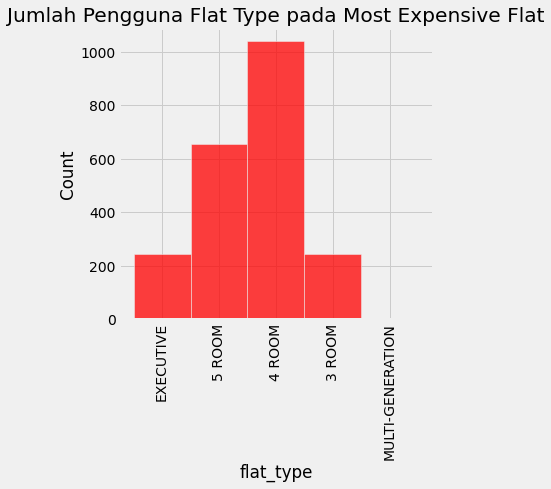

In [285]:
plt.figure(figsize=(5,5))
sns.histplot(data=most_expensive_flat,x='flat_type',color='red')
plt.title('Jumlah Pengguna Flat Type pada Most Expensive Flat')
plt.xticks(rotation=90)

Dapat terlihat bahwa, ketiga town dengan harga resale tertinggi apartmentnya memiliki type yang tertinggi pula, dimana flat_type nya yg paling rendah adalah 3 ROOM dan paling mewah adalah MULTI GENERATION

Type S2, Type S1, Premium Apartment Loft merupakan model apartement yang paling mahal menurut rata-rata resale price nya.

Model flat yang paling banyak dijual adalah Model A, Improved, dan Simplified

In [286]:
cheapest_flat = data[(data['town'] == 'WOODLANDS') | (data['town'] == 'SENGKANG') ]

<AxesSubplot:xlabel='flat_type', ylabel='Count'>

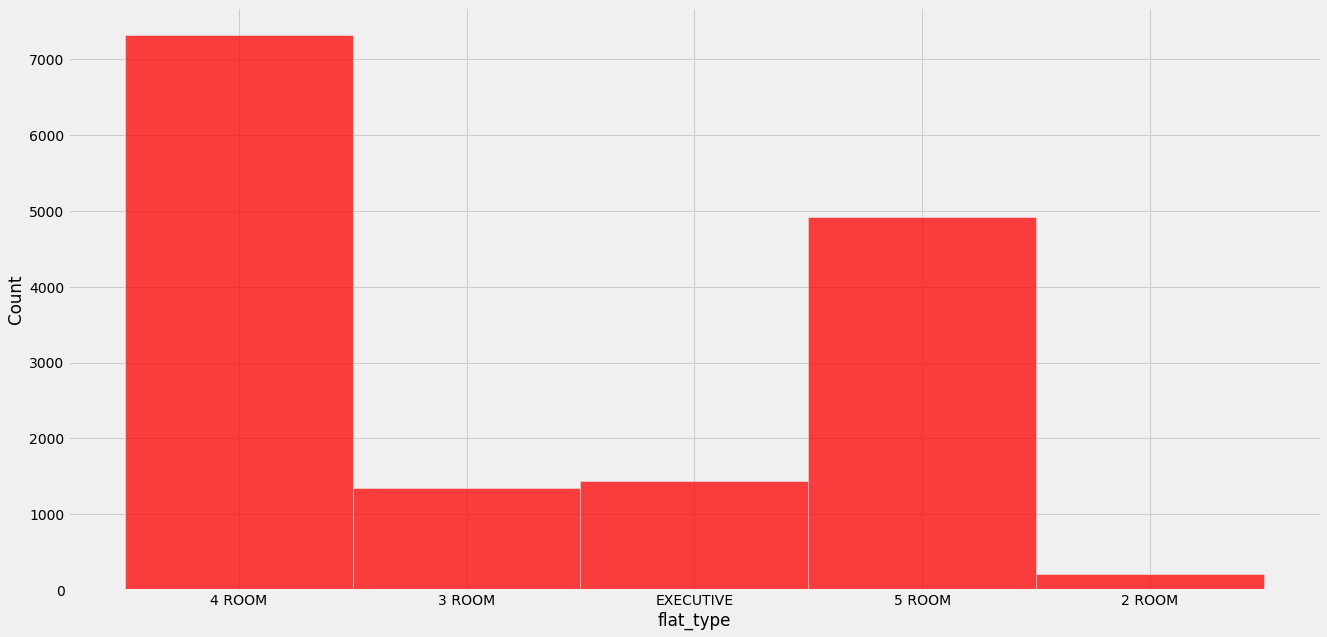

In [287]:
plt.figure(figsize=(20,10))
sns.histplot(data=cheapest_flat,x='flat_type',color='red')

Model yang paling banyak dibeli adalah Model A, Improved, dan New Generation

Dapat terlihat bahwa diantara 3 flat termahal dan 3 flat termurah, pembelian flat justru memiliki model hampir yang sama. Jadi kita harus tahu apakah perbedaan flat model tersebut terhadap feature lain

Text(0.5, 33.11999999999999, 'Luas')

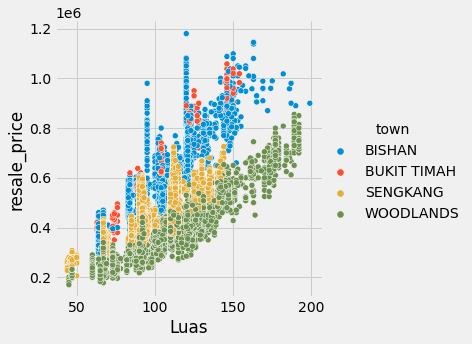

In [288]:
data_mix = pd.concat([most_expensive_flat,cheapest_flat])
rcParams['figure.figsize'] = 15,10
sns.relplot(data=data_mix,x='floor_area_sqm',y='resale_price', hue='town')
plt.xlabel('Luas')


Berdasarkan luas flat, ketika luas flat hampir sama, tetapi harga dari flat most_expensive_flat tetap lebih mahal dibandingkan dengan cheapest_flat. Oleh karena itu, bisa saja, harga flat yang lebih mahal tersebut karena pengaruh dari lokasi yang mungkin strategis

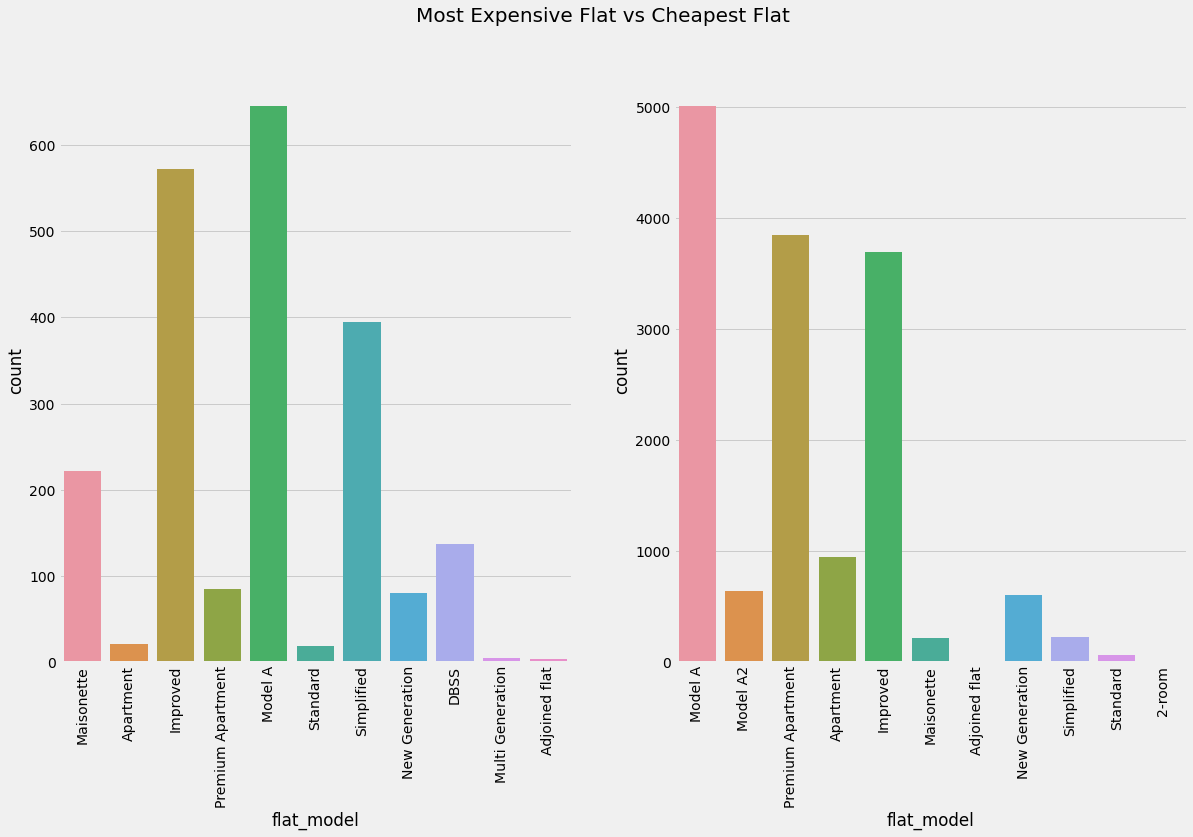

In [289]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
plt.suptitle('Most Expensive Flat vs Cheapest Flat',size=20)

sns.countplot(ax=axes[0], data=most_expensive_flat,x='flat_model')
sns.countplot(ax=axes[1], data=cheapest_flat,x='flat_model')
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)

Pada grafik histogram diatas, untuk banyaknya penjualan flat 2016-2020 untuk Most Expensive Flat adalah
1. Model A
2. Improved
3. Simplified

Sedangkan pada Cheapest Flat adalah
1. Model A
2. Improved
3. New Generation

Dengan flat model yang sama, tetapi karena perbedaan daerah menyebabkan perbedaan harga flat diantara beberapa town. Sehingga, town dapat mempengaruhi resale price dari suatu flat

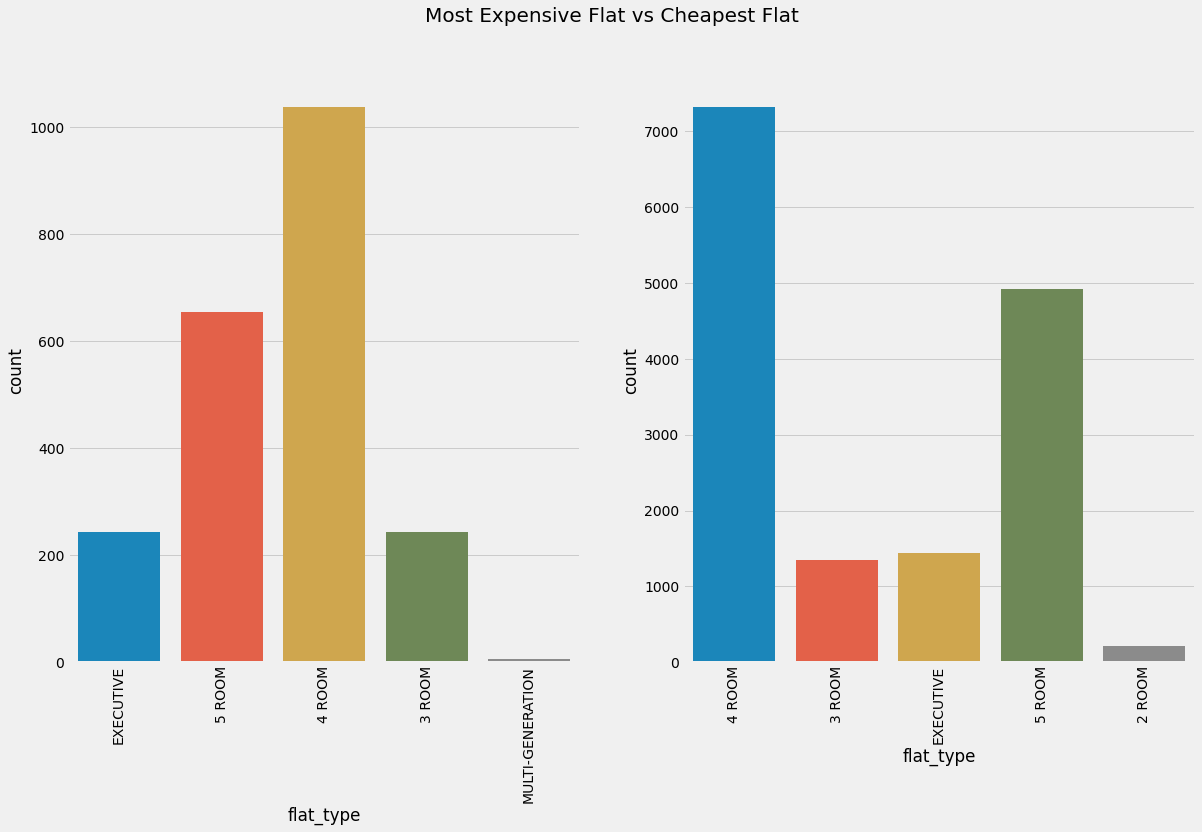

In [290]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
plt.suptitle('Most Expensive Flat vs Cheapest Flat',size=20)
sns.countplot(ax=axes[0], data=most_expensive_flat,x='flat_type')
sns.countplot(ax=axes[1], data=cheapest_flat,x='flat_type')
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)

In [291]:
data[data['flat_type'] == '1 ROOM'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1903 to 93469
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                42 non-null     datetime64[ns]
 1   town                 42 non-null     object        
 2   flat_type            42 non-null     object        
 3   block                42 non-null     object        
 4   street_name          42 non-null     object        
 5   storey_range         42 non-null     object        
 6   floor_area_sqm       42 non-null     float64       
 7   flat_model           42 non-null     object        
 8   lease_commence_date  42 non-null     int64         
 9   remaining_lease      42 non-null     object        
 10  resale_price         42 non-null     float64       
 11  year                 42 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 4.3+ KB


## Floor Area Sqm

<AxesSubplot:xlabel='floor_area_sqm', ylabel='resale_price'>

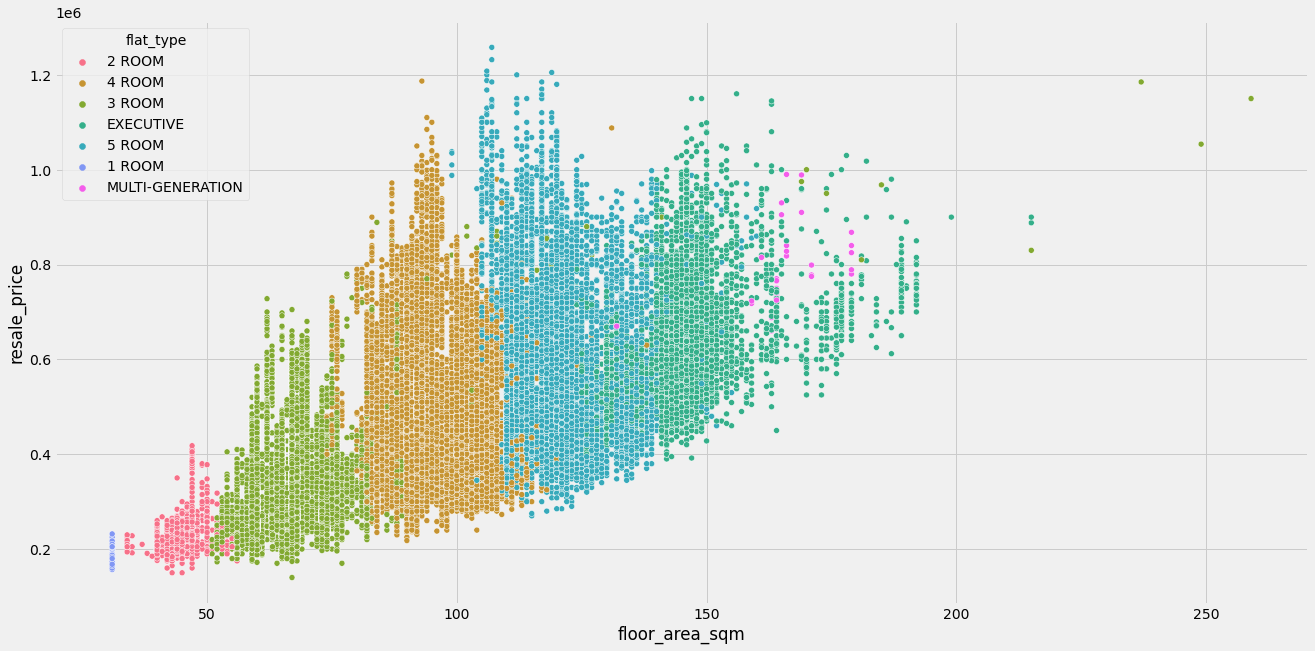

In [292]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='floor_area_sqm', y='resale_price', hue='flat_type')

Text(0.5, 1.0, 'Jumlah Penjualan 2016-2020')

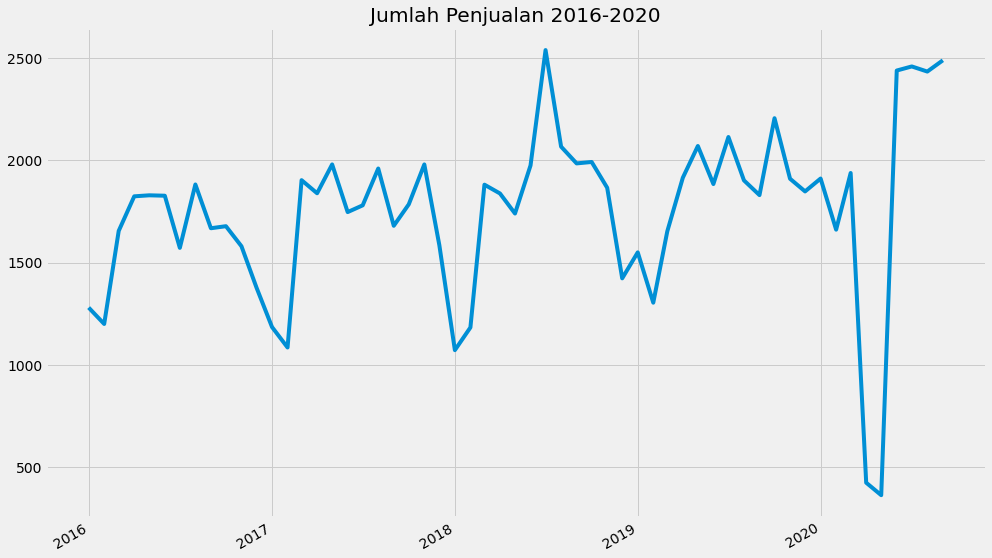

In [293]:
plt.figure(figsize =(15,10))
data['month'].value_counts(ascending=False).plot()
plt.title('Jumlah Penjualan 2016-2020')
#jumlah resale flat selama kurun waktu 2016 hingga 2020

Dapat terlihat pada grafik diatas bahwa saat menuju awal tahun, flat yang terjual akan mengalami penurunan, terutama pada tahun 2020 pada pertengahan tahun

Text(0, 0.5, 'Price(SGD)')

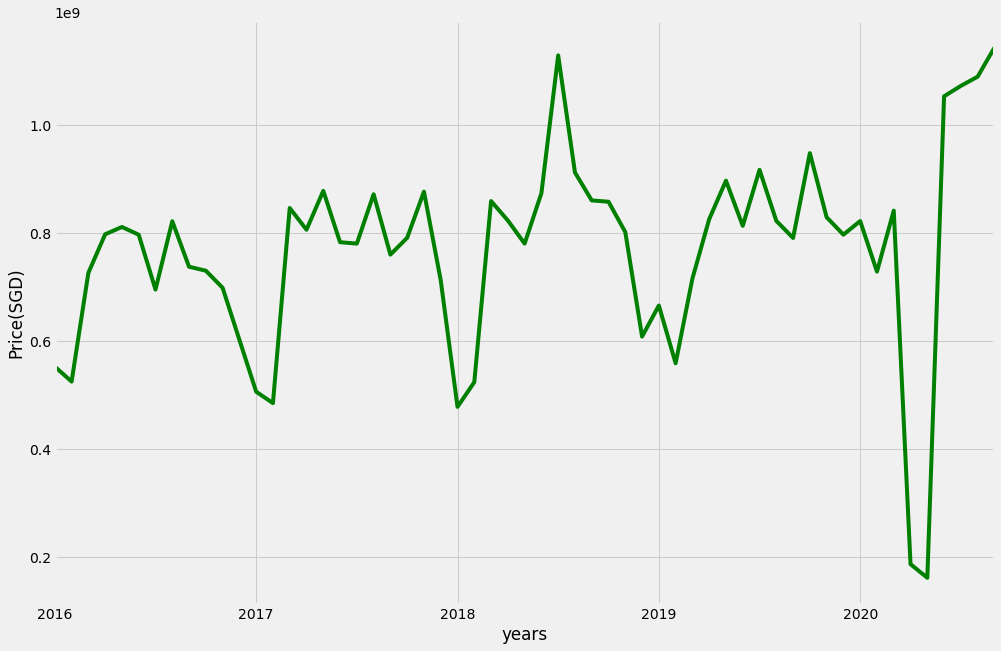

In [294]:
plt.figure(figsize =(15,10))
data.groupby(['month'])['resale_price'].sum().plot(kind='line',color='green')
plt.xlabel('years')
plt.ylabel('Price(SGD)')

Pada awal tahun, hampir selalu terjadi penurunan terhadap total penjualan maupun banyaknya penjualan pada flat.

In [295]:
data2020 = data[data['year'] == 2020]
data2020.sort_values(by='lease_commence_date')

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
88981,2020-03-01,JURONG EAST,3 ROOM,38,TEBAN GDNS RD,04 TO 06,67.0,Improved,1966,45 years 07 months,210000.0,2020
96761,2020-08-01,JURONG EAST,3 ROOM,39,TEBAN GDNS RD,04 TO 06,67.0,Improved,1966,45 years 04 months,228000.0,2020
85499,2020-01-01,JURONG EAST,3 ROOM,37,TEBAN GDNS RD,04 TO 06,67.0,Improved,1966,45 years 09 months,220000.0,2020
94677,2020-07-01,QUEENSTOWN,3 ROOM,82,C'WEALTH CL,04 TO 06,60.0,Standard,1967,45 years 07 months,232000.0,2020
96973,2020-08-01,GEYLANG,2 ROOM,63,CIRCUIT RD,04 TO 06,45.0,Standard,1967,45 years 05 months,193000.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
96199,2020-08-01,CHOA CHU KANG,3 ROOM,807A,CHOA CHU KANG AVE 1,10 TO 12,67.0,Model A,2017,95 years 08 months,335888.0,2020
99420,2020-09-01,KALLANG/WHAMPOA,4 ROOM,8A,UPP BOON KENG RD,22 TO 24,95.0,Premium Apartment,2017,95 years 10 months,840000.0,2020
99573,2020-09-01,CLEMENTI,4 ROOM,440B,CLEMENTI AVE 3,31 TO 33,94.0,Model A,2018,97 years,848800.0,2020
92387,2020-07-01,CLEMENTI,5 ROOM,440C,CLEMENTI AVE 3,31 TO 33,112.0,Improved,2018,97 years 01 month,957888.0,2020


## Lease Commence Date & Remaining Lease

Text(0, 0.5, 'Resale Price (SGD)')

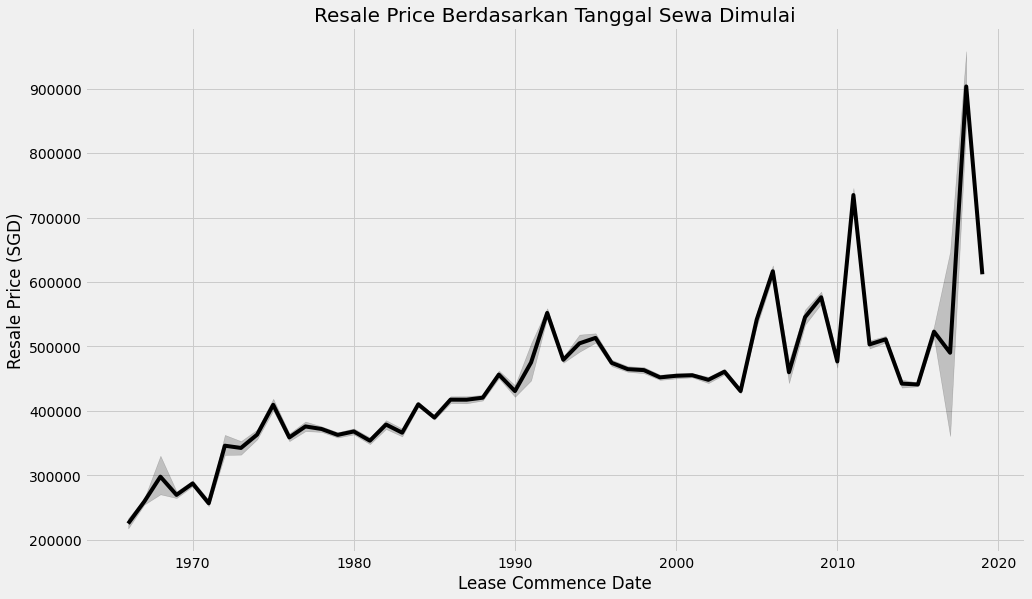

In [296]:
fig = plt.figure(figsize=(15,9))
sns.lineplot(data=data,x='lease_commence_date',y='resale_price',color='black')#lineplot
plt.title('Resale Price Berdasarkan Tanggal Sewa Dimulai',size=20)
plt.xlabel('Lease Commence Date')
plt.ylabel('Resale Price (SGD)')
#melihat banyaknya flat berdasarkan waktu pertama kali sewa

Dapat terlihat pada data awal yaitu tahun 1999 mengalami peningkatan harga jual kembali pada titik terakhir yaitu 2020. Namun terjadi beberapa kenaikan dan penurunan harga jual, sehingga harga penjualan tidak monoton naik. Oleh karena itu, perlu mengetahui korelasi antara resale_price dan lease_commence_date

## Analisis Korelasi

Analisis Korelasi dilakukan pada data yang tipe datanya numerik. Analisis korelasi dilakukan dengan metode spearman dan pearson

<AxesSubplot:>

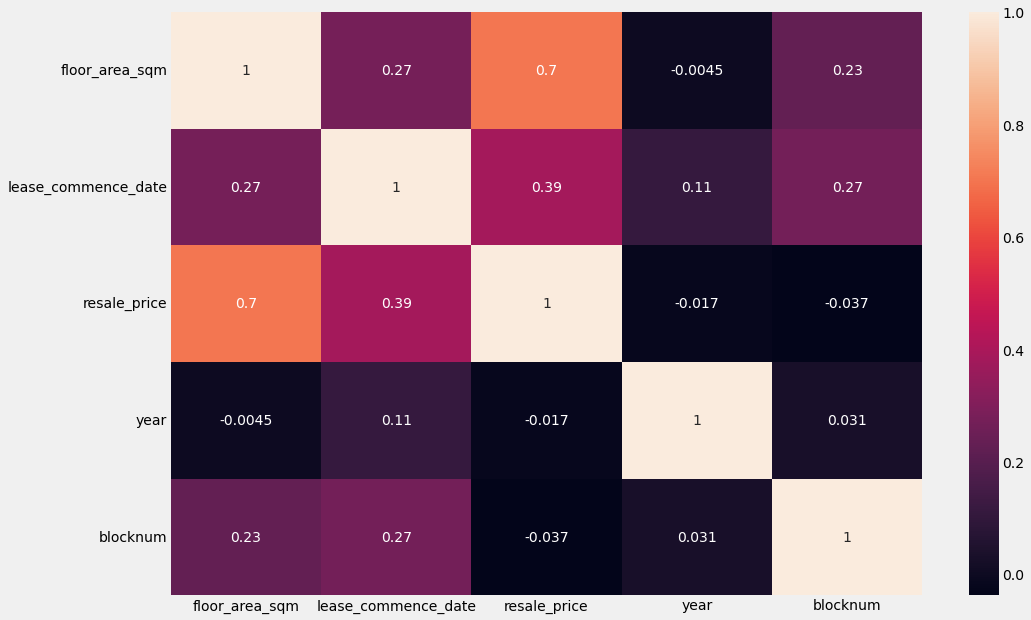

In [297]:
sns.heatmap(data_copy.corr('spearman'),annot=True)

<AxesSubplot:>

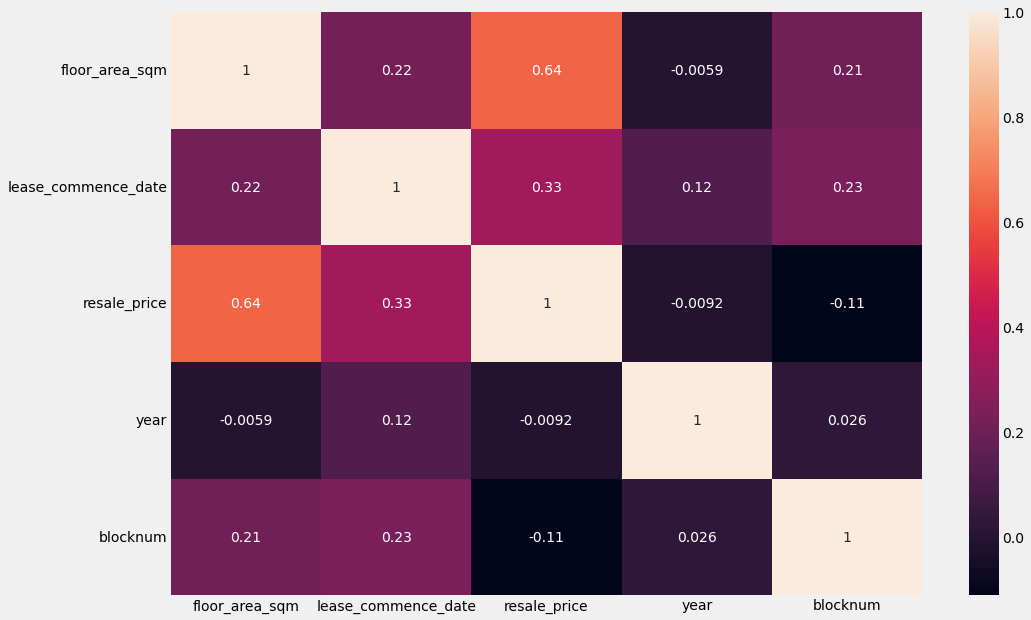

In [298]:
sns.heatmap(data_copy.corr('pearson'),annot=True)

Berdasaarkan correlation spearman dan pearson, dapat ditentukan bahwa floor_area_sqm dan resale_price memiliki korelasi diatas 50%, sehingga memiliki keterkaitan yang kuat antar kedua fitur tersebut. Sedangkan pada sewa pertama atau lease_commence_date memiliki nilai korelasi spearman dan pearson 0,39 dan 0,33 yang mana memiliki korelasi yang cukup kuat.

## Machine Learning Model - Supervised Learning(Regression)

In [299]:
data['year'] = pd.DatetimeIndex(data['month']).year

In [300]:
data_update = data.drop(['month','block','street_name','remaining_lease'], axis =1 )
#menghapus beberapa feature atau kolom yang dianggap kurang penting pada pengaruh resale price harga apartment

In [301]:
data_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99747 entries, 0 to 99746
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   town                 99747 non-null  object 
 1   flat_type            99747 non-null  object 
 2   storey_range         99747 non-null  object 
 3   floor_area_sqm       99747 non-null  float64
 4   flat_model           99747 non-null  object 
 5   lease_commence_date  99747 non-null  int64  
 6   resale_price         99747 non-null  float64
 7   year                 99747 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [302]:
data_update = pd.get_dummies(data_update)

In [303]:
data_update

,floor_area_sqm,lease_commence_date,resale_price,year,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,44.0,1979,230000.0,2016,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90.0,2002,355000.0,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,91.0,2000,350000.0,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,85.0,2001,350000.0,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,85.0,2001,330000.0,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99742,92.0,2014,620000.0,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99743,92.0,2016,452000.0,2020,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
99744,95.0,2016,578888.0,2020,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
99745,108.0,1984,450888.0,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [304]:
y = data_update['resale_price']

In [305]:
X = data_update.loc[:,data_update.columns != 'resale_price']

In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

## Linier Regression

In [307]:
 # create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

# regression intercept
print('Intercept: ', reg.intercept_)

Coefficients:  [   3489.14140939    4554.92189621   -4309.4239593    20467.75878572
    9748.72456305  120903.20450088  -62095.65946668  130218.77043535
 -108172.4143993   223318.66192944  134497.01688398 -152517.93923764
   58992.24728294   58907.12888673  -56585.07340315  -42897.79648273
 -105124.2313376    75471.82857705  172898.58329426  -81034.92238846
  -97414.94198369  139941.18049028 -163281.57559819 -116711.05033473
   22196.61653307  -20795.466243     68724.9978037  -140571.10969334
  -89084.5393979   -76418.1831875   -35408.60356598   -9273.15030694
   10110.02658853   28060.15582549   33520.80884416   49408.94580231
 -111919.03167317  -95294.98634928  -83119.37203568  -73760.6652358
  -64859.70506333  -46705.00892173  -16312.96567057   -7064.42733153
    6811.55382411   35480.9101157    26203.66643662   34960.21843357
   48283.47633344   67441.85349376  111446.70582446   71632.05964291
   96775.71817653  -78032.46619221  -18508.91242007  -49367.16143388
   48774.00113164  -

Variance score: 0.8629978995763558


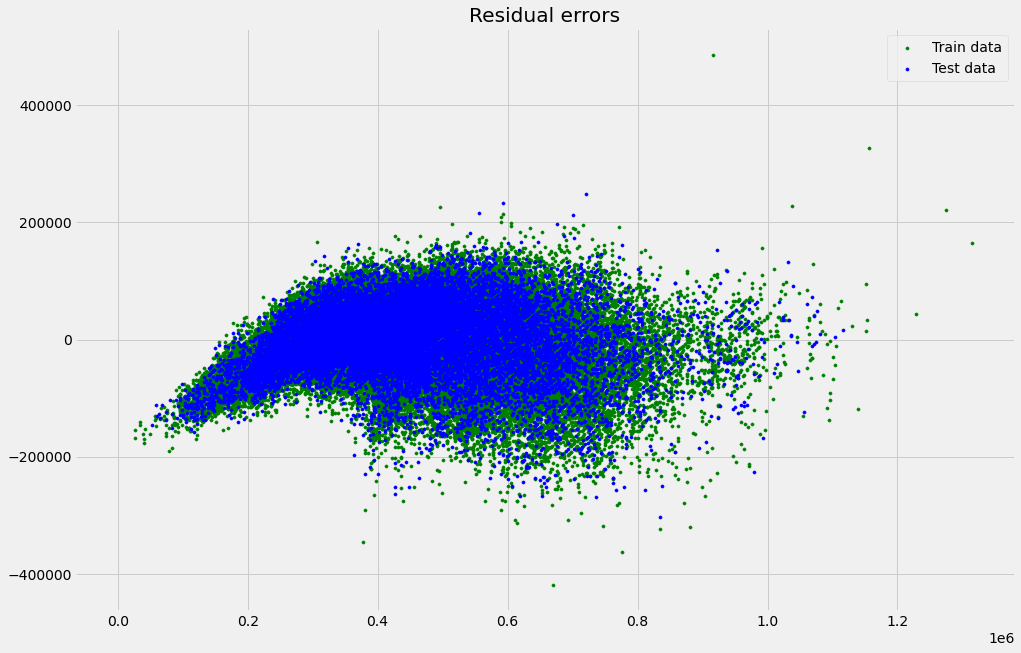

In [308]:
#persebaran variance score untuk train dan test data
print('Variance score: {}'.format(reg.score(X_test, y_test)))
plt.figure(figsize=(15,10))
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [309]:
y_pred = reg.predict(X_test)

In [310]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

42584.26361757749

In [311]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

3071854627.2131996

In [312]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

55424.314404539095

In [313]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8629978995763558

## Ridge regression

In [169]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', model.coef_)

# regression intercept
print('Intercept: ', model.intercept_)

Coefficients:  [   3499.52626539    4556.68517834   -4309.56947724   20491.29432255
    9784.58943717  120831.34393945  -62046.64728806  130207.14620641
 -108077.43631595  222268.25010282  134727.25987874 -152450.52395341
   59009.11130477   58919.76508322  -56511.69927043  -42838.91605746
 -105048.33276462   75583.96785387  172552.03612027  -81012.28450272
  -97307.86008878  139994.36163949 -163101.2908494  -116613.82057754
   22205.51428922  -20770.15540792   68758.20448989 -140528.17858827
  -89025.69859803  -73763.72202506  -35181.59000033   -9206.66164934
    9883.31824079   27556.30213111   32669.1798873    48043.17292171
 -109890.94314399  -93287.96731949  -81114.39035483  -71753.05031678
  -62845.47880991  -44675.09557752  -14287.11239117   -5052.69518176
    8830.3370546    37429.58732079   28024.78369278   36721.89293936
   49950.27644549   68607.71923944   99341.81032006   68000.64884657
   85999.6789915   -58733.19935339  -18683.99632131  -49500.20748275
   48574.19724221  

Telah didapatkan titik potong dan slope pada tiap variabel untuk ridge regression

In [170]:
y_pred = model.predict(X_test)

In [171]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

42584.72078637992

In [172]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

3071879015.601394

In [173]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

55424.534419347125

In [174]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8629968118750111

In [175]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', model.coef_)

# regression intercept
print('Intercept: ', model.intercept_)

Coefficients:  [   3503.3745372     4559.94144202   -4309.10279439   69939.94594464
   59236.62435866  170315.74866442  -12583.42377063  179710.24513778
  -58639.85522016  272425.51048238  184257.21685379 -103033.69467438
  108469.81708298  108394.16733553   -7065.86955166    6556.72512976
  -55602.65139469  125009.54420585  222254.03304765  -31587.91206103
  -47885.55018651  189532.69000001 -113719.60206049  -67182.69414854
   71616.40641375   28663.85468893  118251.19564938  -91114.69166161
  -39591.2819746   -93483.21733595  -55069.53957963  -29225.60321785
  -10222.45536709    7345.53876386   12784.49127209  137629.92742534
  -64037.95289751  -47425.83331775  -35253.01515665  -25897.06300462
  -16995.63890374    1130.59463549   31469.8867233    40690.23010965
   54518.01337329   83095.02911011   73426.08268119   82179.79078453
   95512.73285287  114177.32287744  147515.87783653  112676.08763144
  132525.21758104      -0.           43285.57979285   12979.54260983
  111500.29580546  

C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.388e+13, tolerance: 1.817e+11
  model = cd_fast.enet_coordinate_descent(


In [176]:
y_pred = model.predict(X_test)

In [177]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

42584.46705067491

In [178]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

3071701602.2396073

In [179]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

55422.9339014059

In [180]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.863004724359864

In [181]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', model.coef_)

# regression intercept
print('Intercept: ', model.intercept_)

Coefficients:  [ 3.65878658e+03  2.74476103e+03 -2.68174776e+03  3.55558231e+03
  2.40370696e+03  6.18478181e+03 -2.48827993e+03  1.16678054e+04
 -3.79592160e+03  1.27006052e+03  4.14916774e+03 -8.62104125e+03
  3.73539126e+03  3.02796437e+03 -1.87396113e+03 -4.80363398e+02
 -8.68983579e+03  6.29048808e+03  1.86192372e+03 -2.21509448e+03
 -2.95308111e+03  8.98825363e+03 -5.15226309e+03 -6.48565601e+03
  1.87947157e+03  1.32731680e+03  6.01143147e+03 -1.27685380e+04
 -6.83130990e+03  2.27903311e+01 -6.07123958e+02  2.90749831e+02
 -2.29295004e+03  6.09679159e+02  1.88042870e+03  9.34264530e+01
 -1.05202026e+04 -7.42800733e+03 -3.53290585e+03 -7.91047729e+02
  1.52217748e+03  3.66385343e+03  4.03435126e+03  3.46708224e+03
  2.54498085e+03  2.38639468e+03  1.14455402e+03  1.13360898e+03
  1.26201611e+03  7.46231397e+02  9.74055156e+01  1.67433926e+02
  9.30736058e+01 -3.89279645e+00  3.31417098e+02 -4.51522342e+02
  7.38050957e+03 -2.54803211e+02  4.74446514e+01  3.11190118e+03
 -7.059205

In [182]:
y_pred = model.predict(X_test)

In [183]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

76274.3800453787

In [184]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

11072874480.929977

In [185]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

105227.72676880356

In [186]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.50615922766143

Dari model Multivariate Regression, Ridge Regression, Lasso, dan Elastic Net berdasarkan uji Metric, Elastic Net memiliki nilai R2 Score yang rendah serta nilai MAE, MSE, dan RMSE yang lebih tinggi dibandingkan tiga model lainnya. 

Namun, pada model Multivariate Regression, Ridge Regression dan Lasso, berdasarkan uji metric, dapat terlihat nilai metric tidak terlalu berbeda satu dengan yang lain. Oleh karena itu, perlu mencoba model yang lain yaitu Random Forest Regressor

## Random Forest Regressor 

In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

base_model = RandomForestRegressor()
#import random forest

In [188]:
base_model.fit(X_train, y_train)
base_pred = base_model.predict(X_test)
base_rmse = np.sqrt(mse(y_test, base_pred))
print('Base Model has RMSE:', base_rmse) #rmse dan rsquared
print('Base Model has R2-Score:', r2_score(y_test, base_pred))

Base Model has RMSE: 32659.459770931113
Base Model has R2-Score: 0.9524287503977406


Akurasi menggunakan random forest regressor lebih tinggi dibandingkan dengan dua model regresi sebelumnya dan nilai RMSE dari random forest regressor juga lebih kecil.

In [189]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 3)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 50, num = 4)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [10, 30, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 23, 36, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [190]:
#random forest
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 25, cv = 5, verbose=1, random_state=42, n_jobs=-1,
                              return_train_score=True)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 23, 36, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 30, 50]},
                   random_state=42, return_train_score=True, verbose=1)